# Set up dependencies and env variables

In [1]:
! pip install -U 'pymilvus[model]' cohere ollama openai

  Using cached pymilvus-2.4.5-py3-none-any.whl.metadata (5.6 kB)
  Using cached jiter-0.5.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (3.6 kB)
  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (114 kB)
  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl.metadata (12 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached humanfriendly-10.0-py2.py3-none-any.whl.metadata (9.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.8/207.8 kB 1.4 MB/s eta 0:00:001.3 MB/s eta 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362.9 kB 971.3 kB/s eta 0:00:00MB/s eta 0:00:01:01
Using cached jiter-0.5.0-cp311-cp311-macosx_11_0_arm64.whl (299 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 1.5 MB/s eta 0:00:00 MB/s eta 0:00:01
Using cached pymilvus-2.4.5-py3-none-any.whl (197 kB)
Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl (14.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 1.6 MB/s 

In [17]:
from pprint import pprint
from dotenv import load_dotenv
import os 

load_dotenv()

ZILLIZ_URI = os.getenv('URI')
ZILLIZ_TOKEN = os.getenv('TOKEN')
COHERE_API_KEY = os.getenv('COHERE_API_KEY')

# Milvus, but not Semantic Search 💅

In [18]:
from pymilvus import MilvusClient

milvus_client = MilvusClient(uri=ZILLIZ_URI, token=ZILLIZ_TOKEN)

In [19]:
milvus_client.list_collections()

['cohere_embeddings', 'protein_embedding_esm2nv']

In [20]:
collection_name = "cohere_embeddings"

### Get some stats about the collection

In [21]:
milvus_client.get_collection_stats(collection_name)

{'row_count': 33570424}

In [22]:
milvus_client.describe_index(collection_name=collection_name, index_name="text_vector")

{'index_type': 'HNSW',
 'metric_type': 'COSINE',
 'field_name': 'text_vector',
 'index_name': 'text_vector',
 'total_rows': 33570424,
 'indexed_rows': 33570424,
 'pending_index_rows': 0,
 'state': 'Finished'}

## Check if the collection is Loaded

In [23]:
milvus_client.get_load_state(collection_name=collection_name)

{'state': <LoadState: NotLoad>}

In [24]:
milvus_client.load_collection(collection_name=collection_name)

In [25]:
milvus_client.get_load_state(collection_name=collection_name)

{'state': <LoadState: Loaded>}

In [26]:
pprint(milvus_client.describe_collection(collection_name=collection_name))

{'aliases': [],
 'auto_id': True,
 'collection_id': 450933285225713100,
 'collection_name': 'cohere_embeddings',
 'consistency_level': 2,
 'description': 'Schema for text and paragraph embeddings',
 'enable_dynamic_field': False,
 'fields': [{'auto_id': True,
             'description': '',
             'field_id': 100,
             'is_primary': True,
             'name': 'id',
             'params': {},
             'type': <DataType.INT64: 5>},
            {'description': '',
             'field_id': 101,
             'name': 'text_vector',
             'params': {'dim': 1024},
             'type': <DataType.FLOAT_VECTOR: 101>},
            {'description': '',
             'field_id': 102,
             'name': 'title',
             'params': {'max_length': 5000},
             'type': <DataType.VARCHAR: 21>},
            {'description': '',
             'field_id': 103,
             'name': 'text',
             'params': {'max_length': 5000},
             'type': <DataType.VARCHAR: 2

## Filtering 🪓

In [11]:
FILTER_TITLE = "British Arab Commercial Bank"

res = milvus_client.query(
    collection_name=collection_name,
    filter=f'title like "{FILTER_TITLE}"',
    output_fields=["title", "text"]
)
for elt in res: 
    pprint(elt)

{'id': 450933285225527270,
 'text': 'The British Arab Commercial Bank PLC (BACB) is an international '
         'wholesale bank incorporated in the United Kingdom that is authorised '
         'by the Prudential Regulation Authority (PRA) and regulated by the '
         'PRA and the Financial Conduct Authority (FCA). It was founded in '
         '1972 as UBAF Limited, adopted its current name in 1996, and '
         'registered as a public limited company in 2009. The bank has clients '
         'trading in and out of developing markets in the Middle East and '
         'Africa.',
 'title': 'British Arab Commercial Bank'}
{'id': 450933285225527271,
 'text': 'BACB has a head office in London, and three representative offices '
         'in Algiers in Algeria, Tripoli in Libya and Abidjan in the Cote '
         "D'Ivoire. The bank has 17 sister banks across Europe, Asia and "
         'Africa. It is owned by three main shareholders - the Libyan Foreign '
         'Bank (87.80%), Banque C

In [12]:
res = milvus_client.query(
    collection_name=collection_name,
    filter='text like "%Calectasia%"',
    output_fields=["title", "text"],
    limit=5,
)
for elt in res: 
    pprint(elt)

{'id': 450933285225527360,
 'text': 'Calectasia is a genus of about fifteen species of flowering plants '
         'in the family Dasypogonaceae and is endemic to south-western '
         'Australia. Plants is this genus are small, erect shrubs with '
         'branched stems covered by leaf sheaths. The flowers are star-shaped, '
         'lilac-blue to purple and arranged singly on the ends of short '
         'branchlets.',
 'title': 'Calectasia'}
{'id': 450933285225527361,
 'text': 'Plants in the genus Calectasia are small, often rhizome-forming '
         'shrubs with erect, branched stems with sessile leaves arranged '
         'alternately along the stems,  long and about  wide, the base held '
         'closely against the stem and the tip pointed. The flowers are '
         'arranged singly on the ends of branchlets and are bisexual, the '
         'three sepals and three petals are similar to each other, and joined '
         'at the base forming a short tube but spreading, f

In [13]:
res = milvus_client.query(
    collection_name=collection_name,
    filter='title not in ["British Arab Commercial Bank", "Calectasia"]',
    output_fields=["title", "text"],
    limit=10,
)
for elt in res: 
    pprint(elt)

{'id': 450933285225527281,
 'text': 'The Commonwealth Skyranger, first produced as the Rearwin Skyranger, '
         'was the last design of Rearwin Aircraft before the company was '
         'purchased by a new owner and renamed Commonwealth Aircraft.  It was '
         'a side-by-side, two-seat, high-wing taildragger.',
 'title': 'Commonwealth Skyranger'}
{'id': 450933285225527282,
 'text': 'The Rearwin company had specialized in aircraft powered by small '
         'radial engines, such as their Sportster and Cloudster, and had even '
         'purchased the assets of LeBlond Engines to make small radial engines '
         'in-house in 1937. By 1940, however, it was clear Rearwin would need '
         'a design powered by a small horizontally opposed engine to remain '
         'competitive. Intended for sport pilots and flying businessmen, the '
         '"Rearwin Model 165" first flew on April 9, 1940. Originally named '
         'the "Ranger," Ranger Engines (who also sold severa

## Cohere 🤝 Milvus 

In [27]:
from pymilvus.model.dense import CohereEmbeddingFunction

cohere_ef = CohereEmbeddingFunction(
    model_name="embed-multilingual-v3.0",
    input_type="search_query",
    embedding_types=["float"]
)

In [11]:
docs = [
    "Artificial intelligence was founded as an academic discipline in 1956.",
    "Alan Turing was the first person to conduct substantial research in AI.",
    "Born in Maida Vale, London, Turing was raised in southern England.",
]

docs_embeddings = cohere_ef.encode_documents(docs)

print("Embeddings:", docs_embeddings[0][:10])
print("Dim:", cohere_ef.dim, docs_embeddings[0].shape)


Embeddings: [-0.02929688 -0.02085876 -0.00662231  0.01594543 -0.02879333 -0.0317688
 -0.00242996 -0.02160645  0.00997925 -0.00992584]
Dim: 1024 (1024,)


In [33]:
query = 'Who founded Wikipedia'
embedded_query = cohere_ef.encode_queries([query])

response = embedded_query[0]
print(response[:10])

[-0.02313232 -0.00188732  0.03025818 -0.00238991 -0.0016489  -0.00579453
  0.01339722 -0.01864624 -0.02055359 -0.00737   ]


In [31]:
res = milvus_client.search(data=response, collection_name=collection_name, output_fields=["text"], limit=3)

for elt in res:
    pprint(elt)

[{'distance': 0.7346179485321045,
  'entity': {'text': 'Larry Sanger and Jimmy Wales are the ones who started '
                     'Wikipedia. Wales is credited with defining the goals of '
                     'the project. Sanger created the strategy of using a wiki '
                     "to reach Wales' goal. On January 10, 2001, Larry Sanger "
                     'proposed on the Nupedia mailing list to create a wiki as '
                     'a "feeder" project for Nupedia. Wikipedia was launched '
                     'on January 15, 2001. It was launched as an '
                     'English-language edition at www.wikipedia.com, and '
                     'announced by Sanger on the Nupedia mailing list. '
                     'Wikipedia\'s policy of "neutral point-of-view" was '
                     'enforced in its initial months and was similar to '
                     'Nupedia\'s earlier "nonbiased" policy. Otherwise, there '
                     "weren't very many rul

In [34]:
import json
retrieved_lines_with_distances = [
    (result["entity"]["text"], result["distance"]) for result in res[0]
]
print(json.dumps(retrieved_lines_with_distances, indent=4))

[
    [
        "Larry Sanger and Jimmy Wales are the ones who started Wikipedia. Wales is credited with defining the goals of the project. Sanger created the strategy of using a wiki to reach Wales' goal. On January 10, 2001, Larry Sanger proposed on the Nupedia mailing list to create a wiki as a \"feeder\" project for Nupedia. Wikipedia was launched on January 15, 2001. It was launched as an English-language edition at www.wikipedia.com, and announced by Sanger on the Nupedia mailing list. Wikipedia's policy of \"neutral point-of-view\" was enforced in its initial months and was similar to Nupedia's earlier \"nonbiased\" policy. Otherwise, there weren't very many rules initially, and Wikipedia operated independently of Nupedia.",
        0.7346179485321045
    ],
    [
        "Wikipedia was originally conceived as a complement to Nupedia, a free on-line encyclopedia founded by Jimmy Wales, with articles written by highly qualified contributors and evaluated by an elaborate peer revi

## Use LLM to get a RAG response

In [35]:
context = "\n".join(
    [line_with_distance[0] for line_with_distance in retrieved_lines_with_distances]
)

In [36]:
question = "Who created Wikipedia?"

In [37]:
SYSTEM_PROMPT = """
Human: You are an AI assistant. You are able to find answers to the questions from the contextual passage snippets provided.
"""

USER_PROMPT = f"""
    Use the following pieces of information enclosed in <context> tags to provide an answer to the question enclosed in <question> tags.
    <context>
    {context}
    </context>
    <question>
    {question}
    </question>
"""

In [38]:
from openai import OpenAI

client = OpenAI(
    base_url = 'http://localhost:11434/v1',
    api_key='ollama', # required, but unused
)

response = client.chat.completions.create(
    model="llama3",
    messages=[
        {"role": "system", "content": SYSTEM_PROMPT},
        {"role": "user", "content": USER_PROMPT},
    ],
)
print(response.choices[0].message.content)

According to the provided context, Larry Sanger and Jimmy Wales are the ones who started Wikipedia.


## Release the collection

In [39]:
milvus_client.release_collection(collection_name=collection_name)

# Give us a star on Github ⭐️

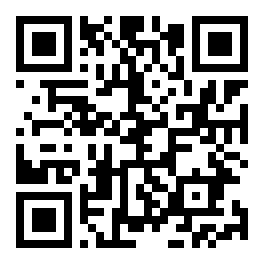

# Add me on LinkedIn
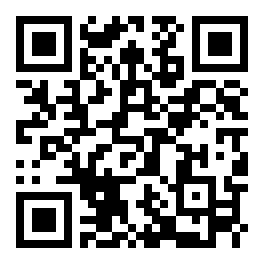

## Misc.

In [9]:
from pymilvus import connections

connections.connect(alias="default", uri=ZILLIZ_URI, port='19530', token=ZILLIZ_TOKEN)

In [10]:
from pymilvus import Collection

collection = Collection(collection_name)

print(collection.schema)

{'auto_id': True, 'description': 'Schema for text and paragraph embeddings', 'fields': [{'name': 'id', 'description': '', 'type': <DataType.INT64: 5>, 'is_primary': True, 'auto_id': True}, {'name': 'text_vector', 'description': '', 'type': <DataType.FLOAT_VECTOR: 101>, 'params': {'dim': 1024}}, {'name': 'title', 'description': '', 'type': <DataType.VARCHAR: 21>, 'params': {'max_length': 5000}}, {'name': 'text', 'description': '', 'type': <DataType.VARCHAR: 21>, 'params': {'max_length': 5000}}], 'enable_dynamic_field': False}


In [11]:
print(type(collection.schema))

<class 'pymilvus.orm.schema.CollectionSchema'>


In [ ]:
from pymilvus import CollectionSchema



In [6]:
milvus_client.describe_collection(collection_name)

{'collection_name': 'cohere_embeddings',
 'auto_id': True,
 'num_shards': 1,
 'description': 'Schema for text and paragraph embeddings',
 'fields': [{'field_id': 100,
   'name': 'id',
   'description': '',
   'type': <DataType.INT64: 5>,
   'params': {},
   'auto_id': True,
   'is_primary': True},
  {'field_id': 101,
   'name': 'text_vector',
   'description': '',
   'type': <DataType.FLOAT_VECTOR: 101>,
   'params': {'dim': 1024}},
  {'field_id': 102,
   'name': 'title',
   'description': '',
   'type': <DataType.VARCHAR: 21>,
   'params': {'max_length': 5000}},
  {'field_id': 103,
   'name': 'text',
   'description': '',
   'type': <DataType.VARCHAR: 21>,
   'params': {'max_length': 5000}}],
 'aliases': [],
 'collection_id': 450933285225713100,
 'consistency_level': 2,
 'properties': {},
 'num_partitions': 1,
 'enable_dynamic_field': False}